In [8]:
import cv2
from deepface import DeepFace
from PIL import Image, ImageFont, ImageDraw
import numpy as np
import matplotlib.pyplot as plt


In [2]:
font = ImageFont.truetype("NotoColorEmoji-Regular.ttf", 100)

In [23]:
def addEmojiOverUsersFace(frame, deepFaceObject):
    obj = deepFaceObject

    print(obj)
    region = obj["region"]
    top_left = (region["x"], region["y"])
    bottom_right = (region["x"] + region["w"], region["y"] + region["h"])
    mid_point = tuple(np.array([top_left, bottom_right]).mean(axis=0))

    cv2.rectangle(frame, top_left, bottom_right, (0, 255, 0), 2)

    emotion = obj["dominant_emotion"]
    if emotion == "happy":
        emoji = u"\U0001F600"
    elif emotion == "sad":
        emoji = u"\U0001F614"
    elif emotion == "angry":
        emoji = u"\U0001F620"
    elif emotion == "neutral":
        emoji = u"\U0001F636"
    elif emotion == "surprise":
        emoji = u"\U0001F632"
    elif emotion == "fear":
        emoji = u"\U0001F631"
    elif emotion == "disgust":
        emoji = u"\U0001F922"
    else:
        emoji = ""

    print(emoji)

    try:
        # Loading the font file
        font = ImageFont.truetype(
            "/System/Library/Fonts/Keyboard.ttf", 50)
    except Exception as e:
        print(f"Error loading font: {e}")
        return frame

    try:
        # Converting frame format and drawing
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        pil_image = Image.fromarray(frame_rgb)
        draw = ImageDraw.Draw(pil_image)
        draw.text((30, 30), emoji, font=font)

        plt.imshow(np.array(pil_image))
        plt.show()
        new_frame = cv2.cvtColor(np.asarray(pil_image), cv2.COLOR_RGB2BGR)
        cv2.imshow("frame", new_frame)
    
        return new_frame

    except Exception as e:
        print(f"Error during drawing: {e}")
        return frame  # Returning the original frame if drawing fails

    
    

Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 28.42it/s]

{'emotion': {'angry': 81.55336599905897, 'disgust': 0.001864180154059958, 'fear': 0.06494021898848187, 'happy': 2.1491998107195127, 'sad': 3.1513418970892553, 'surprise': 2.9778288852776424, 'neutral': 10.101451265638916}, 'dominant_emotion': 'angry', 'region': {'x': 0, 'y': 0, 'w': 1920, 'h': 1080}}
😠


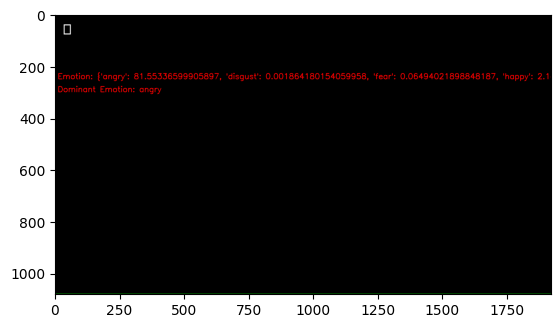

Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 27.85it/s]


{'emotion': {'angry': 6.416326016187668, 'disgust': 1.2676053096072337e-06, 'fear': 5.55233433842659, 'happy': 0.009297041106037796, 'sad': 85.43495535850525, 'surprise': 0.06855702376924455, 'neutral': 2.5185339152812958}, 'dominant_emotion': 'sad', 'region': {'x': 766, 'y': 449, 'w': 235, 'h': 235}}
😔


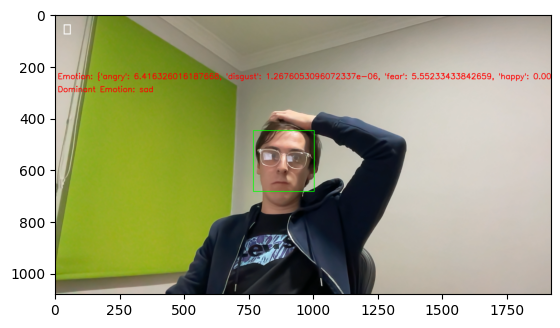

Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 31.61it/s]


{'emotion': {'angry': 9.168267647234481, 'disgust': 1.3217026785064596e-06, 'fear': 4.056644328636607, 'happy': 0.023236946575968375, 'sad': 85.42691642917198, 'surprise': 0.27954591365356285, 'neutral': 1.045384599073577}, 'dominant_emotion': 'sad', 'region': {'x': 770, 'y': 451, 'w': 231, 'h': 231}}
😔


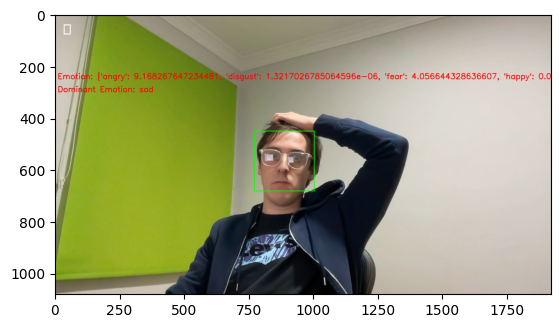

Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 33.38it/s]


{'emotion': {'angry': 11.982482671737671, 'disgust': 6.385415929344163e-06, 'fear': 4.432108625769615, 'happy': 0.05669442471116781, 'sad': 76.44789814949036, 'surprise': 0.05836331401951611, 'neutral': 7.0224471390247345}, 'dominant_emotion': 'sad', 'region': {'x': 775, 'y': 454, 'w': 231, 'h': 231}}
😔


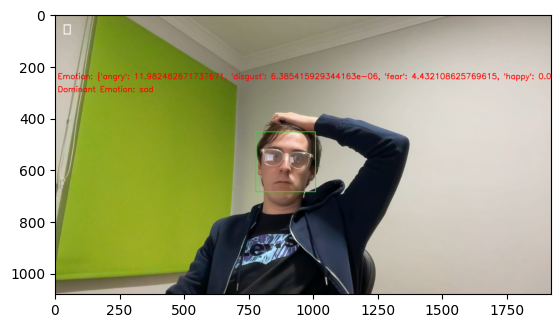

Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 33.54it/s]


{'emotion': {'angry': 23.68757269904451, 'disgust': 9.133587586646896e-06, 'fear': 4.780490236311569, 'happy': 0.010118550438282293, 'sad': 60.382035993458985, 'surprise': 0.0008060193548074352, 'neutral': 11.138968088565354}, 'dominant_emotion': 'sad', 'region': {'x': 767, 'y': 446, 'w': 255, 'h': 255}}
😔


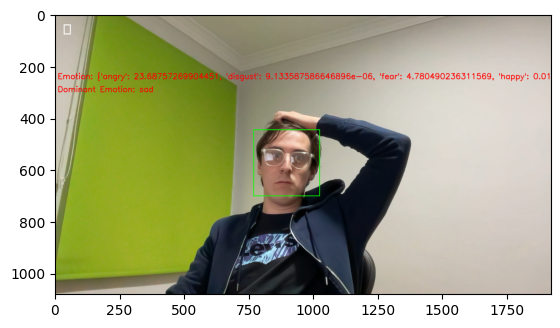

Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 34.02it/s]


{'emotion': {'angry': 1.6465190798044205, 'disgust': 3.5359853933769614e-09, 'fear': 0.7621468510478735, 'happy': 0.0035430784919299185, 'sad': 66.16931557655334, 'surprise': 0.0007240197192004416, 'neutral': 31.41775131225586}, 'dominant_emotion': 'sad', 'region': {'x': 767, 'y': 454, 'w': 248, 'h': 248}}
😔


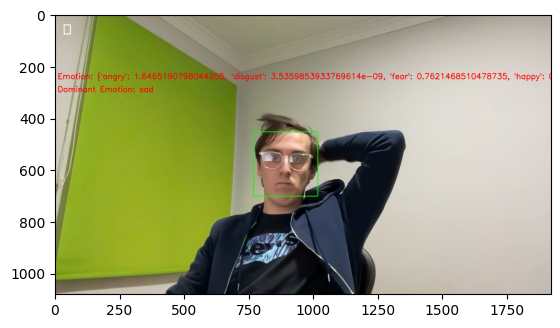

Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 34.98it/s]


{'emotion': {'angry': 7.682412692020811, 'disgust': 1.5862760601447256e-08, 'fear': 0.3816565975062135, 'happy': 1.1804904445587058e-05, 'sad': 91.91834426899621, 'surprise': 4.914483167430137e-06, 'neutral': 0.017562078663198213}, 'dominant_emotion': 'sad', 'region': {'x': 750, 'y': 450, 'w': 263, 'h': 263}}
😔


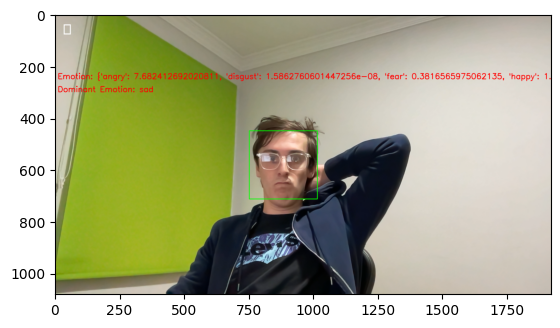

Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 34.95it/s]


{'emotion': {'angry': 1.8909305334091187, 'disgust': 1.3945564538223043e-10, 'fear': 1.2092316523194313, 'happy': 8.193235423448186e-07, 'sad': 96.71888947486877, 'surprise': 5.129777935763968e-07, 'neutral': 0.18094538245350122}, 'dominant_emotion': 'sad', 'region': {'x': 754, 'y': 455, 'w': 254, 'h': 254}}
😔


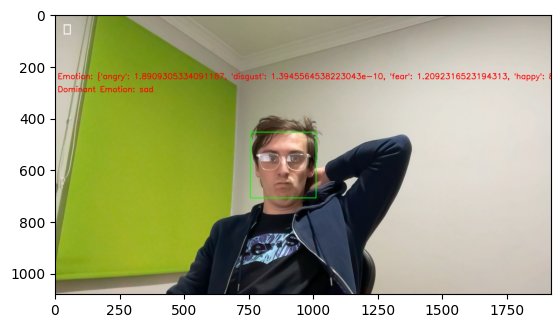

Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 25.11it/s]


{'emotion': {'angry': 0.5752266164598923, 'disgust': 5.49195172428593e-09, 'fear': 2.1759146093231907, 'happy': 9.525215035874694e-06, 'sad': 96.58083956470018, 'surprise': 0.0001160216104770511, 'neutral': 0.6678907801490092}, 'dominant_emotion': 'sad', 'region': {'x': 724, 'y': 449, 'w': 265, 'h': 265}}
😔


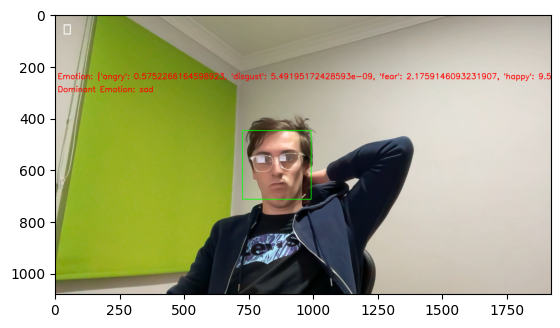

In [24]:
vid = cv2.VideoCapture(0)

# Marca de inicio
disponible = 0
while (True):
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        obj = DeepFace.analyze(frame,
                         enforce_detection=False, actions=['emotion'])

        obj = obj[0]

        cv2.putText(frame, "Emotion: " + str(obj["emotion"]), (10, 250), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        cv2.putText(frame, "Dominant Emotion: " + str(obj["dominant_emotion"]), (10, 300), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

        frame = addEmojiOverUsersFace(frame, obj)

        cv2.imshow("Emociones", frame)

    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break

# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()